# TelecomX LATAM - Análisis de Churn 

## Introducción

En este notebook se realizará un análisis exploratorio de datos para entender los patrones y tendencias en el dataset de clientes de TelecomX LATAM. El objetivo es identificar factores que puedan influir en el churn de los clientes. El churn se define como la cancelación de un servicio por parte de un cliente. Esto afecta directamente a la rentabilidad de la empresa ya que la pérdida de clientes implica una disminución en los ingresos recurrentes, mayores costos de adquisición para reemplazarlos y posibles impactos negativos en la reputación de la marca.

## Importación, Limpieza y Procesamiento de los datos

**Importación**

Primero, se importaron los datos desde un archivo JSON proporcionado por Alura Latam.

In [18]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Limpieza**

Podemos observar que hay algunas columnas que poseen datos en formas de diccionarios como customer, phone, internet y account. Por lo tanto, es necesario descomponer estas columnas para obtener los datos que necesitamos.

In [19]:
for col in ["customer", "phone", "internet", "account"]:
    expanded = pd.json_normalize(df[col])
    expanded.columns = [f"{subcol}" for subcol in expanded.columns]
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Ahora tenemos una visión mas clara de los datos. A continuación, se procede a explicar que significan estos datos.

1) customerID: Identificador unico de cada cliente
2) churn: Indica si el cliente ha dejado de contratar nuestros servicios (1) o no (0)
3) gender: Indica el genero del cliente (F) femenino o (M) masculino
4) SeniorCitizen: Indica si el cliente es mayor de 65 años (1) o no (0)
5) Partner: Indica si el cliente tiene un compañero (1) o no (0)
6) Dependents: Indica si el cliente tiene dependientes (1) o no (0)
7) tenure: Indica el tiempo que el cliente ha estado contratando nuestros servicios (en meses)
8) PhoneService: Indica si el cliente tiene un servicio de telefono (1) o no (0)
9) MultipleLines: Indica si el cliente tiene un servicio de lineas multiples (1) o no (0)
10) InternetService: Indica el tipo de servicio de internet que el cliente tiene (Fiber optic, DSL o No)
11) OnlineSecurity: Indica si el cliente tiene un servicio de seguridad en linea (1) o no (0)
12) OnlineBackup: Indica si el cliente tiene un servicio de respaldo en linea (1) o no (0)
13) DeviceProtection: Indica si el cliente tiene un servicio de protección de dispositivos (1) o no (0)
14) TechSupport: Indica si el cliente tiene un servicio de soporte tecnico (1) o no (0)
15) StreamingTV: Indica si el cliente tiene un servicio de streaming de TV (1) o no (0)
16) StreamingMovies: Indica si el cliente tiene un servicio de streaming de películas (1) o no (0)
17) Contract: Indica el tipo de contrato que el cliente tiene (Month-to-month, One year o Two year)
18) PaperlessBilling: Indica si el cliente tiene un servicio de facturacion sin papel (1) o no (0)
19) PaymentMethod: Indica el metodo de pago que el cliente tiene (Electronic check, Mailed check, Bank transfer (automatic) o Credit card (automatic))
20) MonthlyCharges: Indica el costo mensual de los servicios contratados por el cliente
21) TotalCharges: Indica el costo total de los servicios contratados por el cliente

Vamos a mostrar la información de los datos:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Charges.Total es del tipo object, pero según el dataset, esta columna es númerica, por lo que vamos a proceder con el cambio.

In [21]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Al no haber valores nulos, vamos a proceder con algunas transformaciones.

**Transformación**

Vamos a comenzar con renombrar las columnas y pasarlas a un formato más limpio.

In [23]:
df = df.rename(columns={
    "customerID": "ID",
    "gender" : "Género",
    "SeniorCitizen" : "Ciudadano anciano",
    "Partner" : "Pareja",
    "Dependents" : "Dependientes",
    "tenure" : "Permanencia",
    "PhoneService" : "Servicio de teléfono",
    "MultipleLines" : "Líneas múltiples",
    "InternetService" : "Servicio de internet",
    "OnlineSecurity" : "Seguridad en línea",
    "OnlineBackup" : "Respaldo en línea",
    "DeviceProtection" : "Protección de dispositivos",
    "TechSupport" : "Soporte técnico",
    "StreamingTV" : "Streaming de TV",
    "StreamingMovies" : "Streaming de películas",
    "Contract" : "Contrato",
    "PaperlessBilling" : "Factura sin papel",
    "PaymentMethod" : "Método de pago",
    "Charges.Monthly" : "Cargos mensuales",
    "Charges.Total" : "Cargos totales",
    "Churn" : "Abandono"
    })


In [24]:
df.head(2)

,ID,Abandono,Género,Ciudadano anciano,Pareja,Dependientes,Permanencia,Servicio de teléfono,Líneas múltiples,Servicio de internet,...,Respaldo en línea,Protección de dispositivos,Soporte técnico,Streaming de TV,Streaming de películas,Contrato,Factura sin papel,Método de pago,Cargos mensuales,Cargos totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


Vamos a crear la columna Cuenta Diaria. Para esto, lo que vamos a hacer es dividir Cargos totales por 30, tomando como 30 el numero promedio de dias en un mes.

In [25]:
df["Cuentas Diarias"] = df["Cargos mensuales"] / 30
df.head(2)


,ID,Abandono,Género,Ciudadano anciano,Pareja,Dependientes,Permanencia,Servicio de teléfono,Líneas múltiples,Servicio de internet,...,Protección de dispositivos,Soporte técnico,Streaming de TV,Streaming de películas,Contrato,Factura sin papel,Método de pago,Cargos mensuales,Cargos totales,Cuentas Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


Ahora vamos a cambiar las variables categoricas a variables numericas. Para esto, "Yes" será 1 y "No" será 0.

In [26]:
lista = ["Abandono", "Pareja", "Dependientes", "Servicio de teléfono", "Líneas múltiples", "Seguridad en línea", "Protección de dispositivos", "Soporte técnico", "Streaming de TV", "Streaming de películas", "Factura sin papel"]

for i in lista:
    df[i] = df[i].map({"No": 0, "Yes": 1})

df.head()

,ID,Abandono,Género,Ciudadano anciano,Pareja,Dependientes,Permanencia,Servicio de teléfono,Líneas múltiples,Servicio de internet,...,Protección de dispositivos,Soporte técnico,Streaming de TV,Streaming de películas,Contrato,Factura sin papel,Método de pago,Cargos mensuales,Cargos totales,Cuentas Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Análisis

Comenzamos con un análisis descriptivo de los datos.

In [27]:
df.describe()

,Abandono,Ciudadano anciano,Pareja,Dependientes,Permanencia,Servicio de teléfono,Líneas múltiples,Seguridad en línea,Protección de dispositivos,Soporte técnico,Streaming de TV,Streaming de películas,Factura sin papel,Cargos mensuales,Cargos totales,Cuentas Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Vamos a ver la distribución de la variable churn (Abandono)

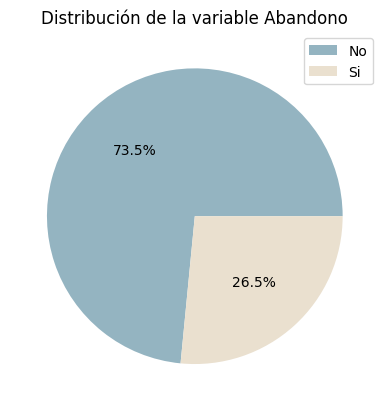

In [28]:
import matplotlib.pyplot as plt

plt.pie(df['Abandono'].value_counts(), autopct='%1.1f%%', colors=['#94B4C1', '#EAE0CF'])
plt.legend(['No', 'Si'])
plt.title('Distribución de la variable Abandono')
plt.show()

Podemos observar que un 73.5% de los clientes no abandonaron el servicio, mientras que un 26.5% sí lo hicieron.

Ahora, para dar más contexto a esta distribución, vamos a ver la proporción de abandono por cada una de las variables categóricas. Estas serán: Género, Ciudadano anciano, Contrato, Método de pago, Soporte técnico y Servicio de internet


/tmp/ipython-input-356477344.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x=col, y="rate", ax=axes[i], palette = colores)
/tmp/ipython-input-356477344.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x=col, y="rate", ax=axes[i], palette = colores)
/tmp/ipython-input-356477344.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x=col, y="rate", ax=axes[i], palette = colores)
/tmp/ipython-input-356477344.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

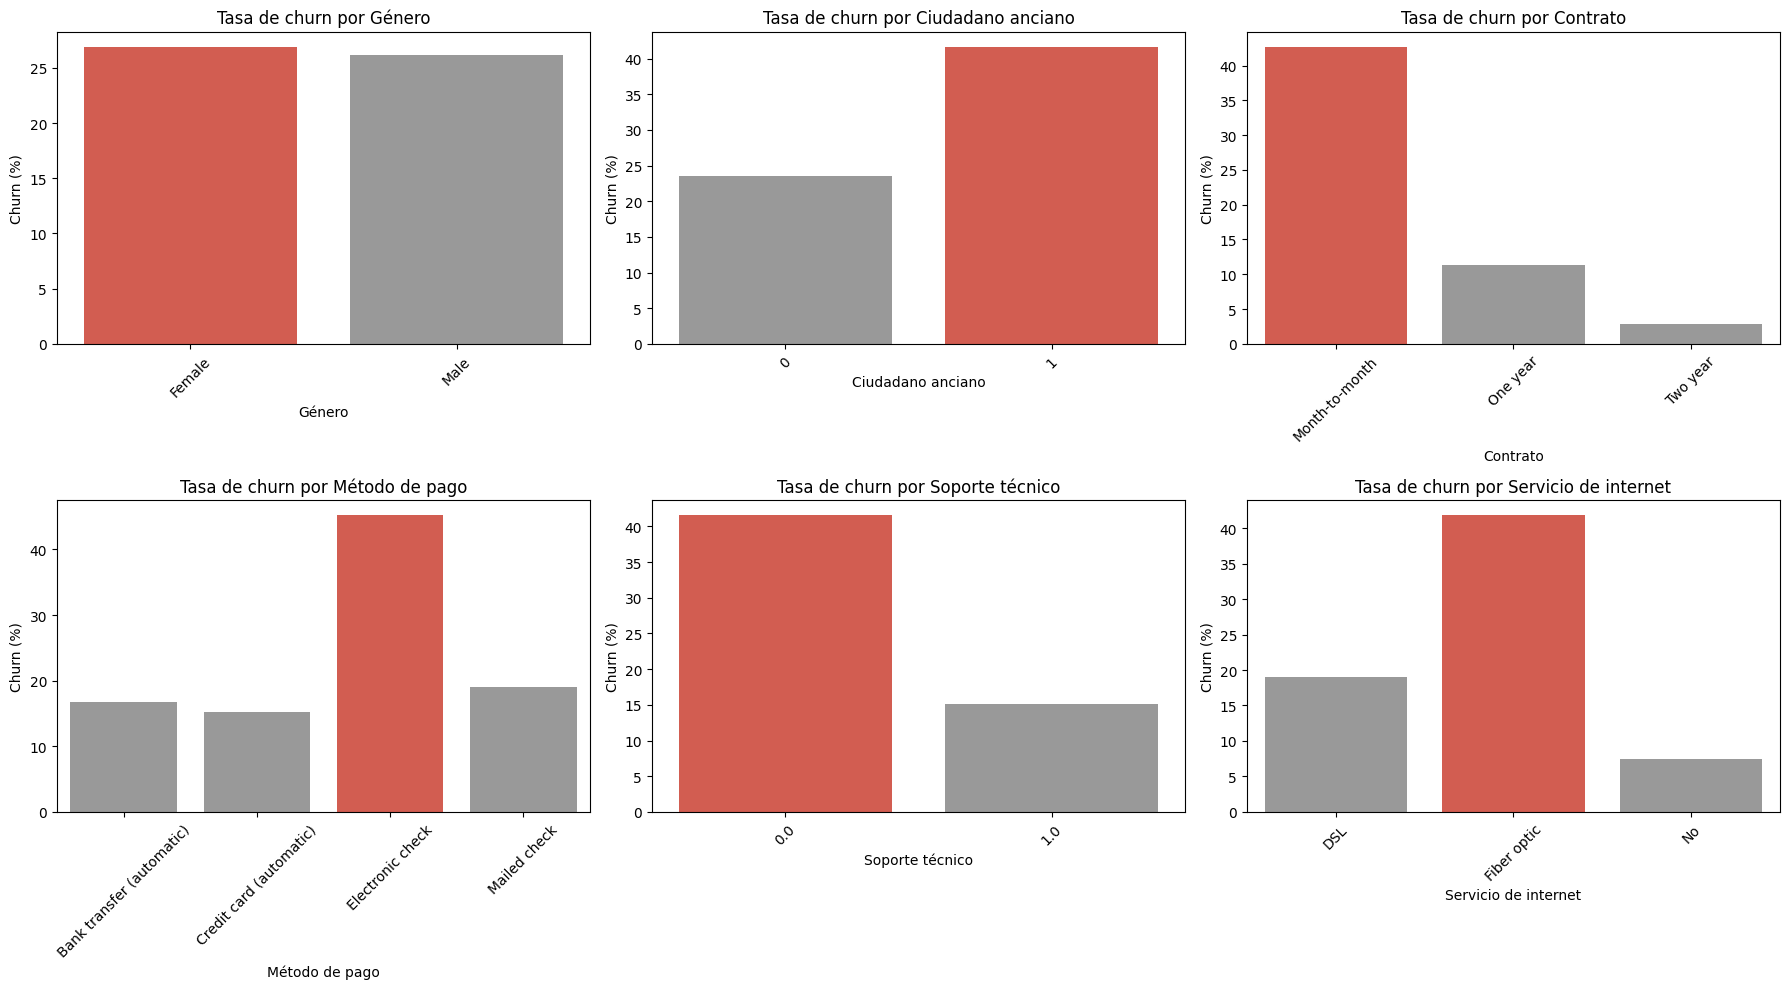

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def churn_rate(df, column):
    return (
        df.groupby(column)["Abandono"]
          .value_counts(normalize=True)
          .rename("rate")
          .mul(100)
          .reset_index()
    )

columnas = ["Género", "Ciudadano anciano", "Contrato", "Método de pago", "Soporte técnico", "Servicio de internet"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
axes = axes.flatten()  

for i, col in enumerate(columnas):
    temp = churn_rate(df, col)
    temp = temp[temp["Abandono"] == 1]

    max_categoria = temp.loc[temp["rate"].idxmax(), col]
    colores = ["#999999" if x != max_categoria else "#E74C3C" for x in temp[col]]

    sns.barplot(data=temp, x=col, y="rate", ax=axes[i], palette = colores)
    axes[i].set_title(f"Tasa de churn por {col}")
    axes[i].set_ylabel("Churn (%)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Tenemos que analizar los abandonos por cada categoría. Observamos lo siguiente:

1. Género: se puede observar que tenemos casi la misma proporción de abandonos para hombres y mujeres, aunque las mujeres son las que más abandonos tienen.
2. Ciudadano anciano: los ciudadanos que son ancianos (valor 1 de x) tienen una proporción de abandonos mayor.
3. Contrato: los clientes que pagan mensualmente tienen una proporción de abandonos mayor.
4. Método de pago: los clientes que pagan por transferencia tienen una proporción de abandonos mayor.
5. Soporte técnico: los clientes que no han tenido soporte técnico (valor 0 de x) tienen una proporción de abandonos mayor.
6. Servicio de internet: los clientes que tienen fibra óptica son los que mayor proporción de abandonos tienen.

Esto es importante saber ya que nos permitirá tomar decisiones para reducir las tasas de abandonos. 

Ahora, haremos lo mismo pero con variables numéricas. Estas serán: Permanencia y Cargos totales.

In [30]:
df.groupby('Abandono')[['Permanencia', 'Cuentas Diarias', 'Cargos totales']].describe()

Permanencia                                                     \
               count       mean        std  min   25%   50%   75%   max   
Abandono                                                                  
0.0           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1.0           1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

         Cuentas Diarias            ...                     Cargos totales  \
                   count      mean  ...       75%       max          count   
Abandono                            ...                                      
0.0               5174.0  2.042171  ...  2.946667  3.958333         5163.0   
1.0               1869.0  2.481378  ...  3.140000  3.945000         1869.0   

                                                                                
                 mean          std    min      25%      50%       75%      max  
Abandono                                                                        
0.0       2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  8672.45  
1.0       1531.796094  1890.822994  18.85  134.500   703.55  2331.300  8684.80  

[2 rows x 24 columns]

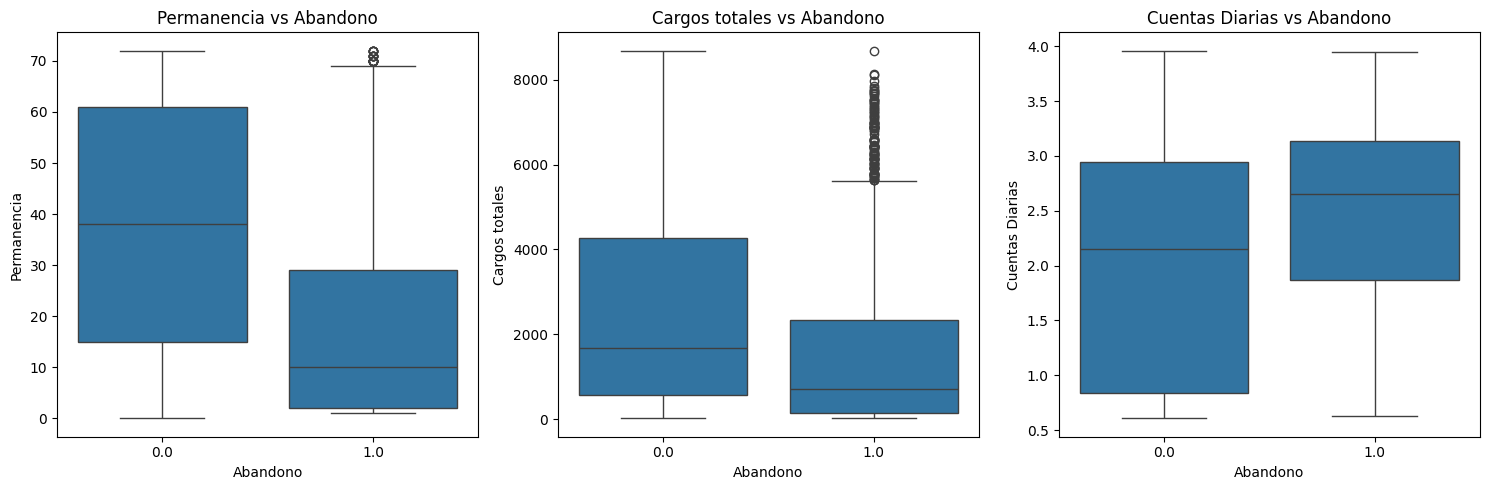

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

columnas = ['Permanencia', 'Cargos totales', 'Cuentas Diarias']

for i, col in enumerate(columnas):
    sns.boxplot(data=df, x="Abandono", y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Abandono")

plt.tight_layout()
plt.show()

In [32]:
q1_permanencia_no_abandono = df['Permanencia'][df['Abandono'] == 0].quantile(0.25)
q3_permanencia_no_abandono = df['Permanencia'][df['Abandono'] == 0].quantile(0.75)

iqr_permanencia_no_abandono = q3_permanencia_no_abandono - q1_permanencia_no_abandono

print(f"Cuartil 1 No Abandono - Permanencia: {q1_permanencia_no_abandono}")
print(f"Cuartil 3 No Abandono - Permanencia: {q3_permanencia_no_abandono}")
print(f"IQR No Abandono - Permanencia: {iqr_permanencia_no_abandono}")

q1_permanencia_abandono = df['Permanencia'][df['Abandono'] == 1].quantile(0.25)
q3_permanencia_abandono = df['Permanencia'][df['Abandono'] == 1].quantile(0.75)

iqr_permanencia_abandono = q3_permanencia_abandono - q1_permanencia_abandono

print(f"Cuartil 1 Abandono - Permanencia: {q1_permanencia_abandono}")
print(f"Cuartil 3 Abandono - Permanencia: {q3_permanencia_abandono}")
print(f"IQR Abandono - Permanencia: {iqr_permanencia_abandono}")


Cuartil 1 No Abandono - Permanencia: 15.0
Cuartil 3 No Abandono - Permanencia: 61.0
IQR No Abandono - Permanencia: 46.0
Cuartil 1 Abandono - Permanencia: 2.0
Cuartil 3 Abandono - Permanencia: 29.0
IQR Abandono - Permanencia: 27.0


Podemos observar que los clientes que si abandonan ocurre en los clientes que poseen menos permanencia, es decir, durante los primeros meses.

In [33]:
q1_cargostotales_no_abandono = df['Cargos totales'][df['Abandono'] == 0].quantile(0.25)
q3_cargostotales_no_abandono = df['Cargos totales'][df['Abandono'] == 0].quantile(0.75)

iqr_cargostotales_no_abandono = q3_cargostotales_no_abandono - q1_cargostotales_no_abandono

print(f"Cuartil 1 No Abandono - Cargos totales: {q1_cargostotales_no_abandono}")
print(f"Cuartil 3 No Abandono - Cargos totales: {q3_cargostotales_no_abandono}")
print(f"IQR No Abandono - Cargos totales: {iqr_cargostotales_no_abandono}")

q1_cargostotales_abandono = df['Cargos totales'][df['Abandono'] == 1].quantile(0.25)
q3_cargostotales_abandono = df['Cargos totales'][df['Abandono'] == 1].quantile(0.75)

iqr_cargostotales_abandono = q3_cargostotales_abandono - q1_cargostotales_abandono

print(f"Cuartil 1 Abandono - Cargos totales: {q1_cargostotales_abandono}")
print(f"Cuartil 3 Abandono - Cargos totales: {q3_cargostotales_abandono}")
print(f"IQR Abandono - Cargos totales: {iqr_cargostotales_abandono}")

Cuartil 1 No Abandono - Cargos totales: 577.825
Cuartil 3 No Abandono - Cargos totales: 4264.125
IQR No Abandono - Cargos totales: 3686.3
Cuartil 1 Abandono - Cargos totales: 134.5
Cuartil 3 Abandono - Cargos totales: 2331.3
IQR Abandono - Cargos totales: 2196.8


Esto nos dice que los clientes que abandonan la empresa, lo hacen con cargos totales bajos.

In [34]:
q1_cuentasdiarias_no_abandono = df['Cuentas Diarias'][df['Abandono'] == 0].quantile(0.25)
q3_cuentasdiarias_no_abandono = df['Cuentas Diarias'][df['Abandono'] == 0].quantile(0.75)

iqr_cuentasdiarias_no_abandono = q3_cuentasdiarias_no_abandono - q1_cuentasdiarias_no_abandono

print(f"Cuartil 1 No Abandono - Cuentas Diarias: {q1_cuentasdiarias_no_abandono}")
print(f"Cuartil 3 No Abandono - Cuentas Diarias: {q3_cuentasdiarias_no_abandono}")
print(f"IQR No Abandono - Cuentas Diarias: {iqr_cuentasdiarias_no_abandono}")

q1_cuentasdiarias_abandono = df['Cuentas Diarias'][df['Abandono'] == 1].quantile(0.25)
q3_cuentasdiarias_abandono = df['Cuentas Diarias'][df['Abandono'] == 1].quantile(0.75)

iqr_cuentasdiarias_abandono = q3_cuentasdiarias_abandono - q1_cuentasdiarias_abandono

print(f"Cuartil 1 Abandono - Cuentas Diarias: {q1_cuentasdiarias_abandono}")
print(f"Cuartil 3 Abandono - Cuentas Diarias: {q3_cuentasdiarias_abandono}")
print(f"IQR Abandono - Cuentas Diarias: {iqr_cuentasdiarias_abandono}")


Cuartil 1 No Abandono - Cuentas Diarias: 0.8366666666666667
Cuartil 3 No Abandono - Cuentas Diarias: 2.9466666666666668
IQR No Abandono - Cuentas Diarias: 2.1100000000000003
Cuartil 1 Abandono - Cuentas Diarias: 1.8716666666666666
Cuartil 3 Abandono - Cuentas Diarias: 3.14
IQR Abandono - Cuentas Diarias: 1.2683333333333335


Los que abandonan el servicio pagan más diariamente que los que no abandonan. 

## Conclusiones

Como pudimos observar a lo largo de todo el análisis, hay algunos aspectos a tener en cuenta respecto al churn. En la empresa, hay un 26.5% de churn, lo que es bastante alto. Respecto a esto:

- Si bien hay una diferencia muy baja entre los clientes masculinos y femeninos, los clientes femeninos tienden a tener un churn ligeramente mayor.
- Los clientes con más edad tienden a tener un churn ligeramente mayor. Esto podría deberse a varios factores: uno de ellos podría ser la falta de adaptación tecnologíca por parte de ellos. Otra razón podría ser los ingresos de los clientes mayores, que tienden a ser menores.
- Con respecto al plan mes a mes, podemos observar que los clientes abandonan el servicio en mayor medida. Esto lo podriamos asociar a que quizás se podría ofrecer algún plan de pago mensual más atractivo, con beneficios o alguna prueba gratuita. 
- Los métodos de pago que se utilizan para pagar el servicio también son un factor relevante. En la empresa, los clientes que pagan por transferencia bancaria tienden a tener un churn ligeramente mayor. Esto podría asociarse a que quizás es un método muy manual y genera mucha fricción entre los clientes. Otra razón podría ser que los clientes no prefieren los otros métodos de pago o sea el único método disponible al que tengan acceso, y este servicio no cumpla sus expectativas, por lo que podría ser una oportunidad de mejora.
- En cuanto a soporte técnico, los clientes que no poseen soporte técnico tienden a abandonar el servicio en mayor medida. Esto también es una oportunidad de mejora de incluir quizás un soporte técnico más accesible y eficiente en los planes.
- El servicio de internet también es un factor muy importante, ya que es fundamental la rapidez y la calidad del servicio. En la empresa, los clientes que poseen fibra óptica tienden a tener un churn ligeramente mayor. Lo que nos indica que debemos mejorar muchisimo más el servicio, porque técnicamente la fibra óptica es mejor que el servicio por cable (DSL).
- Con respecto a la permanencia, los clientes que abandonan el servicio son aquellos que en promedio se quedan menos de 20 meses. Se podría implementar mejoras para retener al cliente lo mas rápido posible o implementar un plan freemium (por ejemplo: 7 días de pruebas y luego se paga).
- Los clientes con cargos totales bajos, son los que más abandonan el servicio y esto va de la mano con el punto anterior: quizás se deberían revisar los planes más accesibles y agregar algún beneficio más.
- Diariamente los usuarios que pagan más, abandonan el servicio. 

Como se vió durante el informe, la empresa Telecom posee una tasa de churn alta. Lo que recomendaría es revisar los planes de servicios y que cosas incluyen en estos planes. A su vez, debería haber una conexión más cercana con el cliente para entender su dolor y el por qué del abandono de servicio. Por otro lado, me parece preocupante que haya más abandonos en usuarios con fibra óptica que con DSL. Claramente se debería estudiar a fondo la verdadera razón, ya que técnicamente debería ser un servicio mejor que el DSL.